# Haar Wavelet


In [125]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt
import math
import IPython.display
from PIL import Image

In [126]:
root2 = math.sqrt(2)

In [127]:
def imshow(image, width=None):
    _, ret = cv2.imencode('.jpg', image)
    i = IPython.display.Image(data=ret, width=width)
    IPython.display.display(i)


## JPG to PGM

In [128]:
def jpg_to_pgm(jpg_path, pgm_path):
    # Abre la imagen JPG
    image = Image.open(jpg_path)

    # Convierte la imagen a escala de grises
    image_gray = image.convert('L')

    # Guarda la imagen en formato PGM
    image_gray.save(pgm_path)

def interpret_pgm(pgm_path):
    # Abre la imagen PGM
    image = Image.open(pgm_path)

    # Obtiene la información de la imagen
    width, height = image.size
    max_gray_value = image.getextrema()[1]

    # Accede a los píxeles de la imagen
    pixels = list(image.getdata())
    # Haces algo con los píxeles...
    # Por ejemplo, puedes imprimir los valores de los primeros 10 píxeles
    return pixels

    # Puedes realizar cualquier otra operación que necesites con los píxeles

# Ruta del archivo JPG
jpg_file = '/home/juanca632/PersonalProjects/stage/wavelet-transform/image_color.jpg'

# Ruta del archivo PGM de salida
pgm_file = 'imagen.pgm'

# Transformar JPG a PGM
jpg_to_pgm(jpg_file, pgm_file)

# Interpretar el archivo PGM
pixels = interpret_pgm(pgm_file)


In [129]:
pixels = np.array(pixels)
pixels = pixels.reshape((512, 512))

# Decomposition


Text(0.5, 1.0, 'Aproximacion')

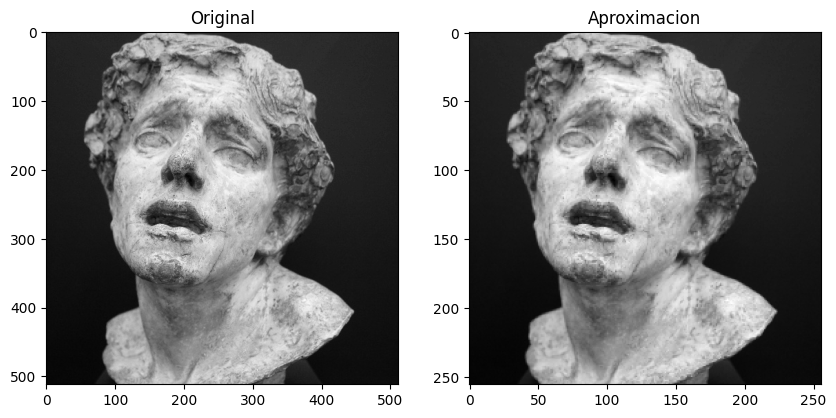

In [130]:
def haar_wavelet_transform(matrix):
    n = int(matrix.shape[0])
    n_half = int(n /2)
    transformed_matrix = np.zeros((n,n))

    if(n >= 2):
        for i in range(0, n):
            aux = 0
            aux2 = int(n_half + aux)
            for j in range(0, n, 2):

                sum = (matrix[i, j] + matrix[i, j+1]) / root2
                dif = (matrix[i, j] - matrix[i, j+1]) / root2
                transformed_matrix[i,aux] = sum
                transformed_matrix[i,aux2] = dif
                aux = aux + 1
                aux2 = aux2 + 1


        transformed_matrix2 = np.copy(transformed_matrix)
        for j in range(0, n_half):
            aux = 0
            aux2 = int(n_half + aux)
            for i in range(0, n, 2):

                sum = (transformed_matrix[i, j] + transformed_matrix[i+1, j]) / root2
                dif = (transformed_matrix[i, j] - transformed_matrix[i+1, j]) / root2
                transformed_matrix2[aux,j] = sum
                transformed_matrix2[aux2,j] = dif
                aux = aux + 1
                aux2 = aux2 + 1

        transformed_matrix3 = transformed_matrix2[:n_half,:n_half]

    return transformed_matrix2, transformed_matrix3

# Ejemplo de matriz 4x4
matrix_test = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9, 10, 11, 12],
                   [13, 14, 15, 16]])
image_result, image_aprox = haar_wavelet_transform(pixels)

def normalize_matrix(matrix):
    min_val = np.min(matrix)
    max_val = np.max(matrix)
    normalized_matrix = np.interp(matrix, (min_val, max_val), (0, 255))
    return normalized_matrix

image_aprox = normalize_matrix(image_aprox)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(pixels, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(image_aprox, cmap='gray')
axes[1].set_title('Aproximacion')




# Reconstruction

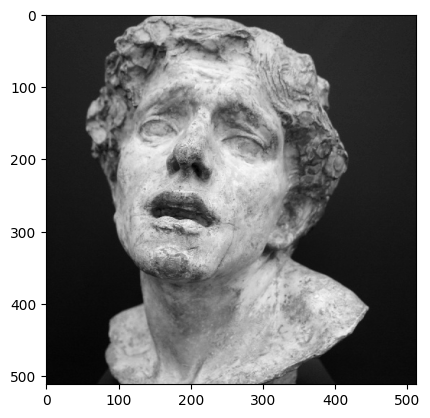

In [131]:
def inverse_haar_wavelet_transform(transformed_matrix):
    n = transformed_matrix.shape[0]
    n_half = n // 2
    reconstructed_matrix = np.copy(transformed_matrix)

    if n >= 2:
        # Reconstrucción vertical
        for j in range(n_half):
            aux = 0
            aux2 = n_half + aux
            for i in range(0, n, 2):
                s = transformed_matrix[aux, j]
                d = transformed_matrix[aux2, j]
                reconstructed_matrix[i, j] = s + d
                reconstructed_matrix[i + 1, j] = s - d
                aux += 1
                aux2 += 1

        # Reconstrucción horizontal
        reconstructed_matrix2 = np.zeros_like(reconstructed_matrix)
        for i in range(n):
            aux = 0
            aux2 = n_half + aux
            for j in range(0, n, 2):
                s = reconstructed_matrix[i, aux]
                d = reconstructed_matrix[i, aux2]
                reconstructed_matrix2[i, j] = s + d
                reconstructed_matrix2[i, j + 1] = s - d
                aux += 1
                aux2 += 1
        return reconstructed_matrix2

    return transformed_matrix

# Ejemplo de matriz transformada
transformed_matrix = np.array([[6, -2, 0, 0],
                               [5, -1, 1, 0],
                               [2, 0, -2, 0],
                               [1, 1, 1, -3]])

image_original = inverse_haar_wavelet_transform(image_result)

print("\n")
# print(image_original)
plt.imshow(image_original,  cmap="gray")
plt.show()


# Comparison

Text(0.5, 1.0, 'Reconstruida')

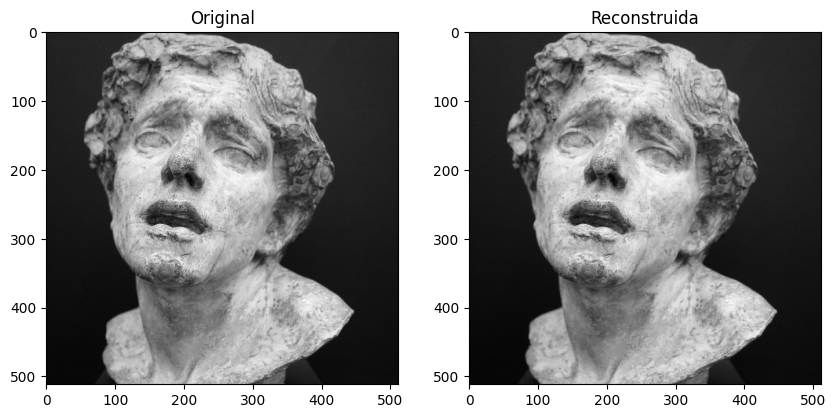

In [132]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(image_original, cmap='gray')
axes[1].set_title('Reconstruida')